In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

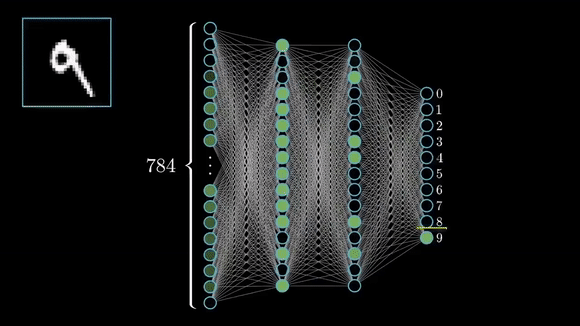

In [ ]:
# 딥러닝 모델 구성
# 초기 모델 설정 tf.keras.models (초기 설정)
# 딥러닝 모델을 쌓을때 tf.keras.layers(모델 구성)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #mnist 28*28로 되어있는 데이터 데이터의 형태를 입력!
    tf.keras.layers.Dense(128, activation='relu'), #첫번째 층은 128개의 동그라미로 구성
    tf.keras.layers.Dropout(0.2), #과적합을 방지
    tf.keras.layers.Dense(10) #0~9 출력 데이터
])

In [ ]:
model.compile(optimizer='adam', #옵티마이저
              loss = 'sparse_categorical_crossentropy', #손실함수 -> 다중분류일때 사용(3가지 이상)
              metrics = ['accuracy']) # 평가지표

In [ ]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3304 - accuracy: 0.3516
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.2791 - accuracy: 0.3138
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3001 - accuracy: 0.1953
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026 - accuracy: 0.1762
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3037 - accuracy: 0.1670


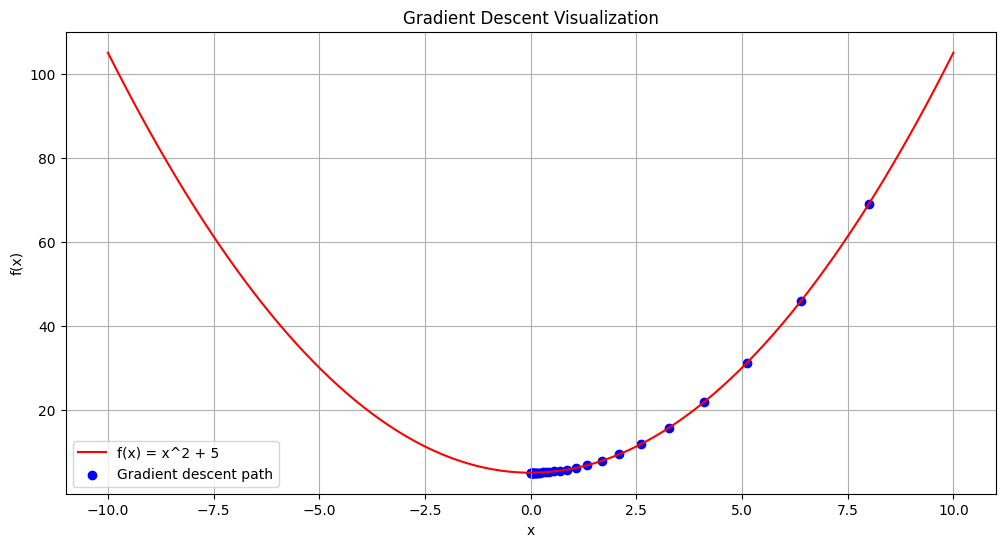

시작점: 8
최종점: 0.0099
최종 함수값: 5.0001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 간단한 2차 함수 정의
def f(x):
    return x**2 + 5

# 함수의 미분
def df(x):
    return 2*x

# 경사 하강법
def gradient_descent(start, learn_rate, num_iterations):
    x = start
    x_history = [x]

    for _ in range(num_iterations):
        x = x - learn_rate * df(x)
        x_history.append(x)

    return x_history

# 시각화
x = np.linspace(-10, 10, 100)
start = 8
learn_rate = 0.1
num_iterations = 30

x_history = gradient_descent(start, learn_rate, num_iterations)

plt.figure(figsize=(12, 6))
plt.plot(x, f(x), 'r-', label='f(x) = x^2 + 5')
plt.scatter(x_history, [f(x) for x in x_history], c='b', label='Gradient descent path')
plt.title('Gradient Descent Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

print(f"시작점: {start}")
print(f"최종점: {x_history[-1]:.4f}")
print(f"최종 함수값: {f(x_history[-1]):.4f}")


### 2.1 Fashion MNIST 데이터셋 소개

Fashion MNIST는 의류 이미지 분류를 위한 데이터셋으로, 기존 MNIST 손글씨 숫자 데이터셋의 대안으로 만들어졌습니다. 이 데이터셋은 다음과 같은 특징을 가지고 있습니다:

- **10개의 카테고리**: 각 이미지가 속하는 의류의 종류
- **28x28 픽셀의 그레이스케일 이미지**: 각 이미지는 28x28 픽셀 크기의 흑백 이미지
- **60,000개의 훈련 이미지와 10,000개의 테스트 이미지**: 모델 학습과 평가에 사용할 수 있는 데이터

### 카테고리:

1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

In [ ]:
# 1. 환경설정
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fashion MNIST 데이터셋 로드
# TensorFlow의 keras.datasets 모듈을 사용하여 데이터셋을 로드합니다.
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 클래스 이름 정의
# 각 레이블에 해당하는 클래스 이름을 정의합니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# 데이터셋 기본 정보 출력
# 데이터셋의 형태와 크기를 출력합니다.
print(f"훈련 이미지 형태: {train_images.shape}")
print(f"훈련 레이블 형태: {train_labels.shape}")
print(f"테스트 이미지 형태: {test_images.shape}")
print(f"테스트 레이블 형태: {test_labels.shape}")

훈련 이미지 형태: (60000, 28, 28)
훈련 레이블 형태: (60000,)
테스트 이미지 형태: (10000, 28, 28)
테스트 레이블 형태: (10000,)


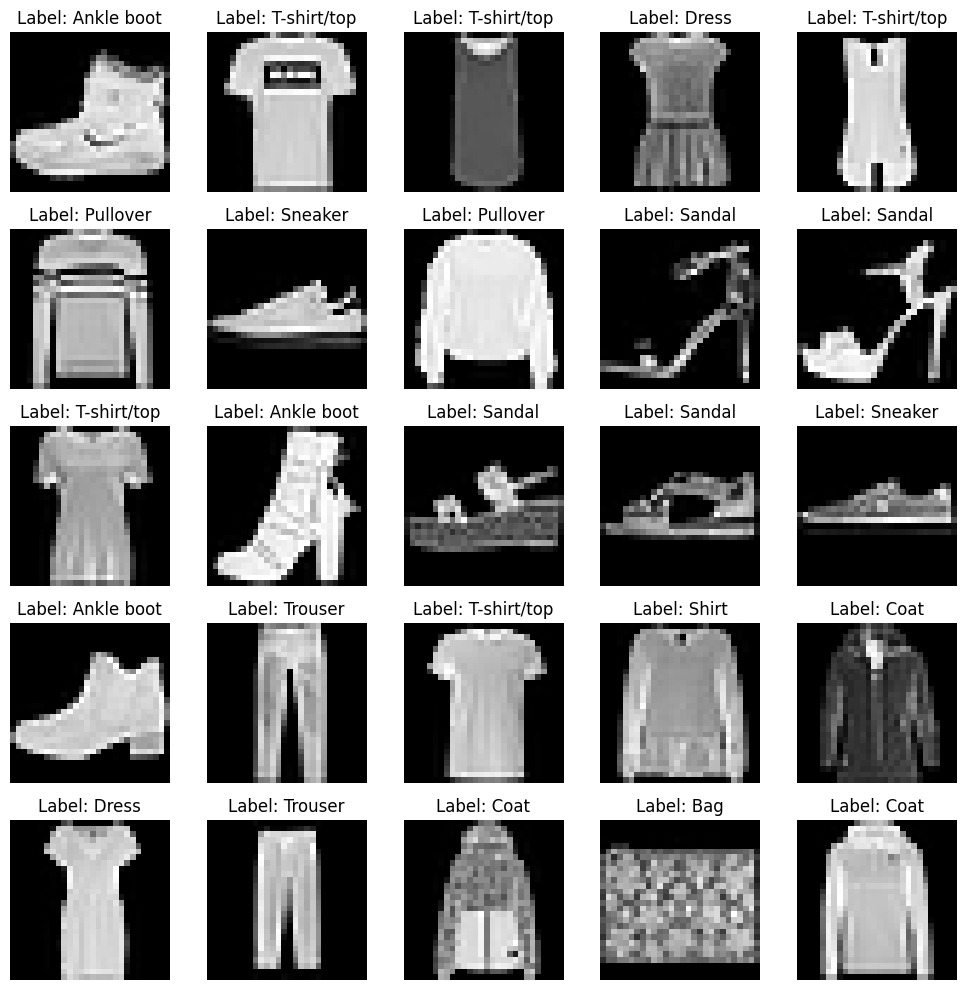

In [ ]:
# 이미지 시각화 함수
# 주어진 이미지와 레이블을 시각화하는 함수입니다.
def plot_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {class_names[label]}")
    plt.axis('off')

# 샘플 이미지 시각화
# 훈련 데이터셋에서 25개의 이미지를 샘플로 시각화합니다.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plot_image(train_images[i], train_labels[i])
plt.tight_layout()
plt.show()

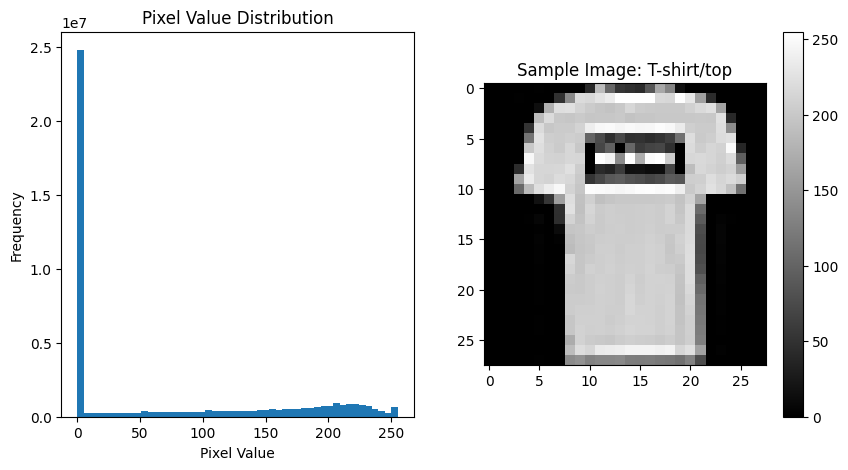

In [ ]:
# 픽셀 값 분포 확인
# 픽셀 값의 분포를 히스토그램으로 나타내어 데이터의 특성을 파악합니다.
plt.figure(figsize=(10, 5))

# 전체 훈련 이미지의 픽셀 값 분포
plt.subplot(1, 2, 1)
plt.hist(train_images.ravel(), bins=50)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# 첫 번째 훈련 이미지 시각화
plt.subplot(1, 2, 2)
plt.imshow(train_images[1], cmap='gray')
plt.title(f'Sample Image: {class_names[train_labels[1]]}')
plt.colorbar()
plt.show()

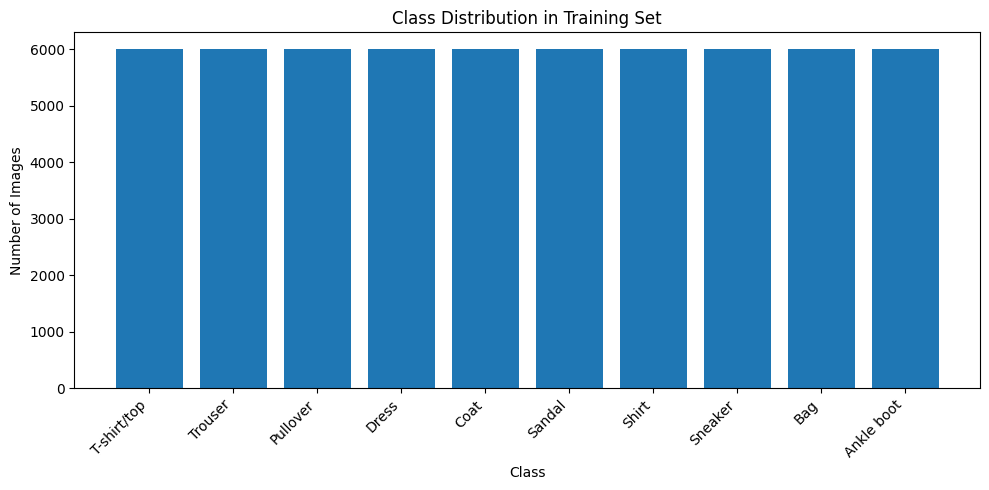

In [ ]:
# 레이블 분포 확인
# 각 클래스별 이미지 수를 막대 그래프로 표시하여 클래스 분포를 확인합니다.
unique, counts = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 데이터 전처리!
# 딥러닝 모델의 성능을 높이기 위해 데이터 전처리가 필요합니다. 일반적으로 사용하는 전처리 과정은 다음과 같습니다:

# 1. **정규화(Normalization)**: 이미지의 픽셀 값을 0-255에서 0-1 사이의 값으로 변환합니다.
# 2. **차원 확장(Reshaping)**: 모델 입력에 맞게 데이터의 차원을 변경합니다. 딥러닝!
# 3. **데이터 증가(Data Augmentation): 이미지에 대한 데이터가 부족할 경우 모델을 일반화하여 성능을 높이는 기법

# (train_images, train_labels), (test_images, test_labels)

# 픽셀값을 0~1사이로 정규화
train_images = train_images/225.0
test_images = test_images/225.0


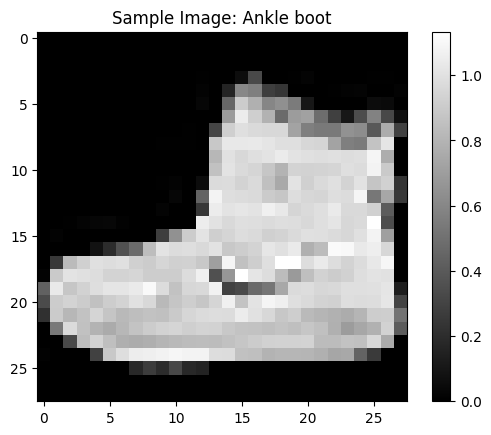

In [ ]:
# 정규화된 첫 번째 이미지 확인
plt.imshow(train_images[0], cmap='gray')
plt.title(f'Sample Image: {class_names[train_labels[0]]}')
plt.colorbar()
plt.show()

In [ ]:
# 데이터 증강
# 부츠
# 90도 기울기
# 색상을 바꾸기
# 뒤집기 -> 좌우변환
# 크기를 줄이기

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 데이터 증강 설정

datagen = ImageDataGenerator(
    rotation_range = 10, #회전 범위
    width_shift_range = 0.1, # 가로 / 수평 이동 범위
    height_shift_range = 0.1, # 세로 / 수직 이동 범위
    horizontal_flip = True # 수평 반전 / 뒤집기
)

In [ ]:
# 차원 확장: (28, 28) -> (28, 28, 1)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(f"변경된 훈련 이미지 형태: {train_images.shape}")
print(f"변경된 테스트 이미지 형태: {test_images.shape}")

변경된 훈련 이미지 형태: (60000, 28, 28, 1)
변경된 테스트 이미지 형태: (10000, 28, 28, 1)


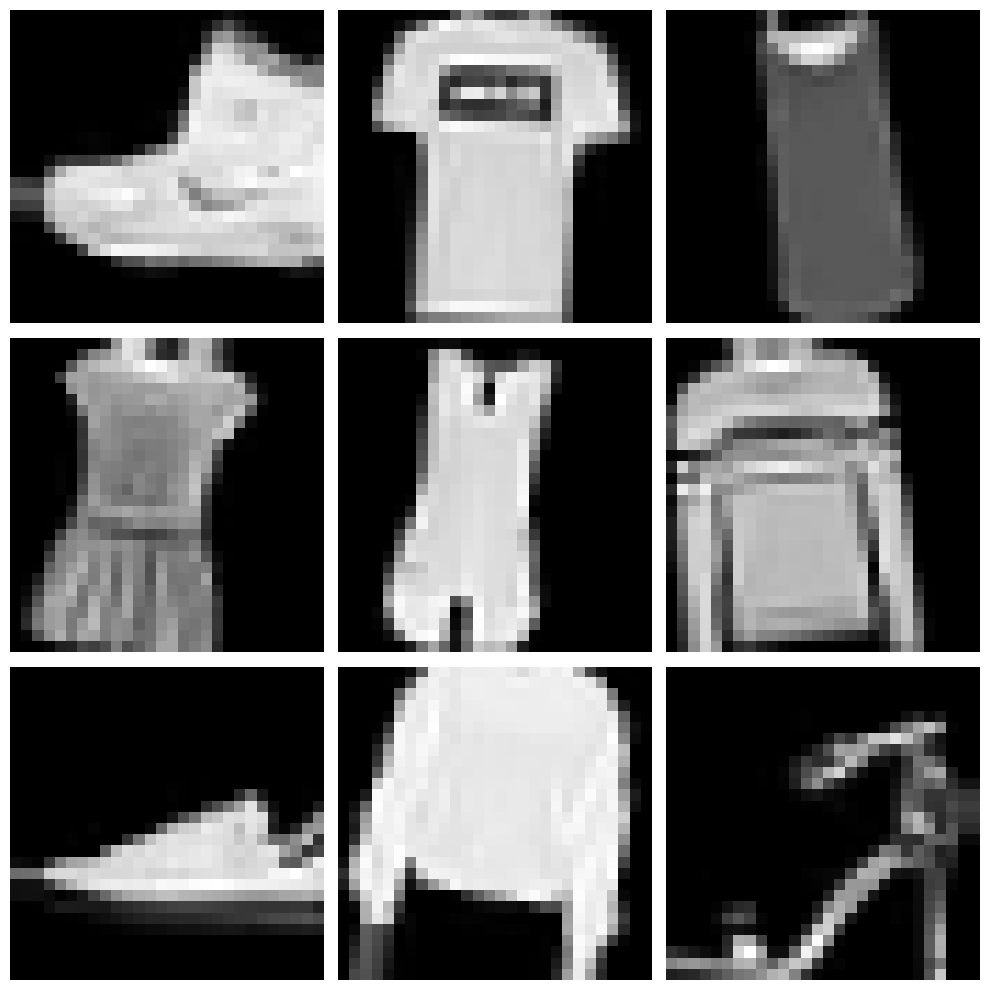

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = datagen.random_transform(train_images[i])
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
import tensorflow as tf

# Sequential 모델 생성
model = tf.keras.Sequential()

# Flatten 레이어: 입력 이미지를 1차원 배열로 변환합니다.
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# Dense 레이어: 은닉층 1, 뉴런 수 128, 활성화 함수 ReLU
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Dense 레이어: 은닉층 1, 뉴런 수 64, 활성화 함수 ReLU 8의 배수로 추가!
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Dense 레이어: 은닉층 1, 뉴런 수 128, 활성화 함수 ReLU
model.add(tf.keras.layers.Dense(16, activation='relu'))

# Dense 레이어: 출력층, 뉴런 수 10 (클래스 수), 활성화 함수 Softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fashion MNIST 데이터셋 로드 및 전처리
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# 모델 훈련
model.fit(train_images, train_labels, epochs=5) # epochs은 100이하로 하는 것을 추천!

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\\n테스트 정확도: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5615 - accuracy: 0.8042
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3923 - accuracy: 0.8578
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3547 - accuracy: 0.8707
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3350 - accuracy: 0.8782
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3195 - accuracy: 0.8823
313/313 - 1s - loss: 0.3564 - accuracy: 0.8718 - 601ms/epoch - 2ms/step
\n테스트 정확도: 0.8718000054359436


In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time

# Fashion MNIST 데이터셋 로드
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터 전처리 CNN Model을 위한 데이터 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# 모델 구축
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)),  # 명시적 입력 레이어 추가
    keras.layers.Conv2D(32, (5, 5), activation='relu'), # CNN모델 구축
    keras.layers.MaxPooling2D((2, 2)), # CNN모델 구축
    keras.layers.Flatten(), # 보통 CNN모델 이후 Flatten()
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 모델 구조 출력
model.summary()

# Ram 12G / Core 8core / GPU 지원 가능 / TPU도 가능

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 592074 (2.26 MB)
Trainable params: 592074 (2.

In [5]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
end_time = time.time()

# 총 학습 시간 계산
training_time = end_time - start_time
print(f'\nTotal training time: {training_time:.2f} seconds')

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\\nTest accuracy: {test_acc}')

import matplotlib.pyplot as plt

# 훈련 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 값 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/5
1688/1688 [==============================] - 39s 23ms/step - loss: 0.3458 - accuracy: 0.8763 - val_loss: 0.3041 - val_accuracy: 0.8863
Epoch 2/5
1688/1688 [==============================] - 38s 23ms/step - loss: 0.2636 - accuracy: 0.9036 - val_loss: 0.2691 - val_accuracy: 0.9008
Epoch 3/5
1688/1688 [==============================] - 37s 22ms/step - loss: 0.2261 - accuracy: 0.9167 - val_loss: 0.2541 - val_accuracy: 0.9093
Epoch 4/5
  57/1688 [>.............................] - ETA: 46s - loss: 0.1896 - accuracy: 0.9271

KeyboardInterrupt: 

Epoch 1/5
1688/1688 [==============================] - 24s 9ms/step - loss: 0.4053 - accuracy: 0.8562 - val_loss: 0.3192 - val_accuracy: 0.8868
Epoch 2/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2782 - accuracy: 0.8992 - val_loss: 0.2758 - val_accuracy: 0.8998
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2359 - accuracy: 0.9129 - val_loss: 0.2590 - val_accuracy: 0.9090
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2019 - accuracy: 0.9248 - val_loss: 0.2631 - val_accuracy: 0.9073
Epoch 5/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1766 - accuracy: 0.9341 - val_loss: 0.2564 - val_accuracy: 0.9065

Total training time: 85.29 seconds
313/313 - 1s - loss: 0.2695 - accuracy: 0.9038 - 659ms/epoch - 2ms/step
\nTest accuracy: 0.9038000106811523


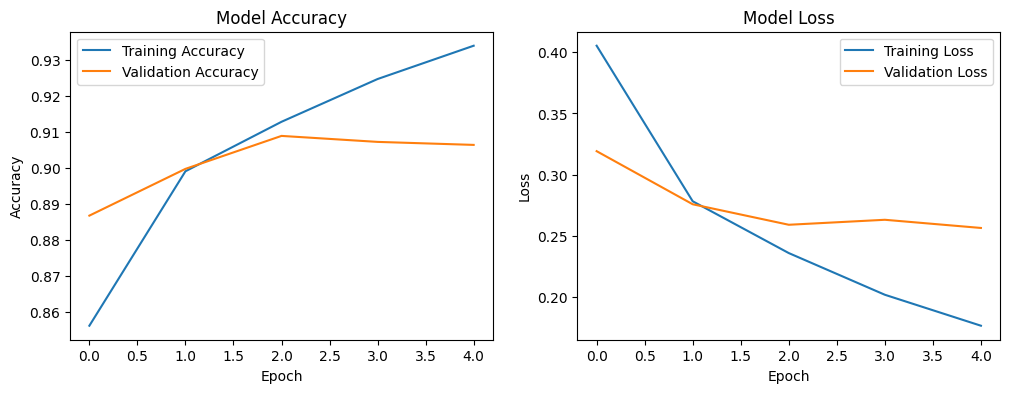

In [2]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
end_time = time.time()

# 총 학습 시간 계산
training_time = end_time - start_time
print(f'\nTotal training time: {training_time:.2f} seconds')

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\\nTest accuracy: {test_acc}')

import matplotlib.pyplot as plt

# 훈련 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 값 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [1]:
import tensorflow as tf

# GPU 장치 확인
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# TPU 클러스터 초기화
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU 클러스터 인식
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except ValueError:
    strategy = tf.distribute.get_strategy()  # TPU가 없으면 기본 전략 사용
    print("Running on default strategy.")

# Fashion MNIST 데이터셋 로드
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# TPU 전략 범위 내에서 모델 구축 및 컴파일
with strategy.scope():
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(28, 28, 1)),  # 명시적 입력 레이어 추가
        keras.layers.Conv2D(32, (5, 5), activation='relu'), # CNN모델 구축
        keras.layers.MaxPooling2D((2, 2)), # CNN모델 구축
        keras.layers.Flatten(), # 보통 CNN모델 이후 Flatten()
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # 모델 컴파일
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 구조 출력
model.summary()

# 모델 훈련
# 모델 학습 시간 측정
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.1)
end_time = time.time()

# 총 학습 시간 계산
training_time = end_time - start_time
print(f'\nTotal training time: {training_time:.2f} seconds')


# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

import matplotlib.pyplot as plt

# 훈련 과정 시각화
plt.figure(figsize=(12, 4))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 손실 값 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Running on TPU: 
4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 592074 (2.26 MB)
Trainable p


KeyboardInterrupt



In [3]:
# 모델 저장
model.save('fashion_mnist_model.h5')
print("모델이 'fashion_mnist_model.h5'로 저장되었습니다.")


모델이 'fashion_mnist_model.h5'로 저장되었습니다.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
